# Router


![Screenshot 2024-08-21 at 9.24.09 AM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbac6543c3d4df239a4ed1_router1.png)


In [4]:
from langchain_ollama.chat_models import ChatOllama

def Multiply(a: int, b: int): 
    """Multiply call this tool 
    when you want to multiply two numbers 
    Args: 
        a:int 
        b:int
    Returns: 
        a*b
    """
    return a * b

llm_with_tools = ChatOllama(model="llama3-groq-tool-use",tempreture=0).bind_tools([Multiply])
llm_with_tools.invoke("multiply 5 and 5").tool_calls

[{'name': 'Multiply',
  'args': {'a': 5, 'b': 5},
  'id': 'a116b055-bcde-41a6-82e0-968b8d030535',
  'type': 'tool_call'}]

In [5]:
from langgraph.graph import START, END, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

def tool_selector(state: MessagesState): 
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

#create builder
builder = StateGraph(MessagesState)

#adding nodes
builder.add_node("tool_selector", tool_selector)
builder.add_node("tools",ToolNode([Multiply]))

#adding edges
builder.add_edge(START,"tool_selector")
builder.add_conditional_edges("tool_selector", tools_condition)
builder.add_edge("tools",END)

In [7]:
#create workflow 
workflow = builder.compile()

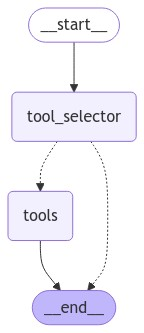

In [8]:
from IPython.display import Image, display

display(Image(workflow.get_graph().draw_mermaid_png()))

In [10]:
workflow.invoke({"messages": ("user","multiply 2 and 55")})

{'messages': [HumanMessage(content='multiply 2 and 55', id='7b747949-6e6b-462a-9c60-cbbb430e1fb0'),
  AIMessage(content='', response_metadata={'model': 'llama3-groq-tool-use', 'created_at': '2024-09-13T18:04:12.404609369Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'Multiply', 'arguments': {'a': 2, 'b': 55}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 1201970268, 'load_duration': 30943470, 'prompt_eval_count': 186, 'prompt_eval_duration': 49746000, 'eval_count': 31, 'eval_duration': 1079204000}, id='run-f1a70a92-6cd9-426a-b9f1-8a84174adf8f-0', tool_calls=[{'name': 'Multiply', 'args': {'a': 2, 'b': 55}, 'id': '4b770de1-ba2b-4548-b05e-46c57faae511', 'type': 'tool_call'}], usage_metadata={'input_tokens': 186, 'output_tokens': 31, 'total_tokens': 217}),
  ToolMessage(content='110', name='Multiply', id='c0fccd8e-9e3b-481e-990b-5102597343d9', tool_call_id='4b770de1-ba2b-4548-b05e-46c57faae511')]}